<center><font size=8>Hands-on - Linear Regression</font></center>

#Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution

# **Problem Statement**

## **Business Context**

In the dynamic and competitive market of mobiles and tablets, retailers need to be aware of market trends and adapt to changing consumer preferences and technological advancements. They also need to efficiently manage inventory and marketing strategies to attract new customers and retain existing ones, ensuring sustained growth and profitability.

A renowned online retailer faces the challenge of managing inventory and managing marketing expenditures. To address these challenges, the retailer aims to accurately forecast sales to make informed decisions regarding inventory management and resource allocation. In addition, they also want to identify key levers influencing sales to strategically focus on areas that can drive growth.  The end goal is to minimize stockouts and overstock situations and enhance sales performance to gain a competitive advantage.

## **Objectives**

As a data scientist, you are provided with sales data from the recent past along with other attributes like pricing strategies, promotional activities, and customer engagement. You are required to analyze the data, identify patterns, build a linear regression model to forecast sales, and identify factors contributing to changes in sales.

## **Data Dictionary**

1. Advertising Expenditure: Amount spent on advertisements (in dollars) across different marketing channels
2. Campaign Engagement Score: A score computed by the marketing team based on the engagement (likes, comments, shares) on social media campaigns
3. Discount Percentage: Average discount offered for a given product
4. Average Customer Rating: Average rating provided by customers for the product
5. Product Price: The price of the product (in dollars)
6. Return Rate: The average rate of return once the product has been delivered
7. Length of Product Description: Number of words in the description of the product
8. Region: Region where the product is sold (North, South, East, or West)
9. Popularity: The level of popularity of the product (ranges from very low to very high)
10. Sales: Amount of sales (in dollars)

**Note**: Product here refers to a mobile or a tablet.

# **Importing the necessary libraries**

In [ ]:
# to load and manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to split the data into train and test sets
from sklearn.model_selection import train_test_split

# to build a linear regression model
from sklearn.linear_model import LinearRegression

# to check a regression model's performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# **Loading the data**

In [ ]:
 #uncomment and run the following line if using Google Colab
 from google.colab import drive
 drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading data into a pandas dataframe
sales = pd.read_csv('/content/drive/My Drive/UTA_AI_ML/Linear_regression/insurance.csv')

In [ ]:
# creating a copy of the data
data = sales.copy()

# **Data Overview**

## **Checking the first 5 rows**

In [ ]:
data.head(5)

,Advertising Expenditure,Campaign Engagement Score,Discount Percentage,Average Customer Rating,Product Price,Return Rate,Length of Product Description,Region,Popularity,Sales
0,644.049317,54.565531,25.267151,4.604634,1599.575723,2.133580,231.185389,East,High,26246.91291
1,521.483294,46.875226,35.075859,4.358693,1586.464404,1.553437,262.686931,West,Very High,21432.16935
2,540.079510,42.287145,12.618381,4.571018,1301.644856,2.274891,324.347319,South,Very High,22551.92436
3,627.938419,61.825441,31.588445,4.234209,1601.041884,1.035971,447.710984,South,Very High,27792.29446
4,471.149948,31.061512,9.198991,4.816215,1496.734345,3.276840,310.055333,East,Moderate,17354.77148


## **Checking the shape of the data**



In [ ]:
data.shape

(1338, 7)

* The dataset has 3000 rows and 10 columns.

## **Checking the attribute types**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
 7   log_bmi   1338 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB


* There are 8 numerical and 2 categorical variables in the data.

## **Checking the statistical summary**

In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


* On an average, the retailer has sold mobiles and tablets worth ~$24k.
* On an average, ~600 dollars have been spent on adversiting.
* The mobiles and tablets sold by the retailer are priced between 10 to 2000 dollars approx.

## **Checking for missing values**

In [ ]:
data.isnull().sum()

Advertising Expenditure          0
Campaign Engagement Score        0
Discount Percentage              0
Average Customer Rating          0
Product Price                    0
Return Rate                      0
Length of Product Description    0
Region                           0
Popularity                       0
Sales                            0
dtype: int64

* There are no missing values in the data

## **Checking for duplicate values**

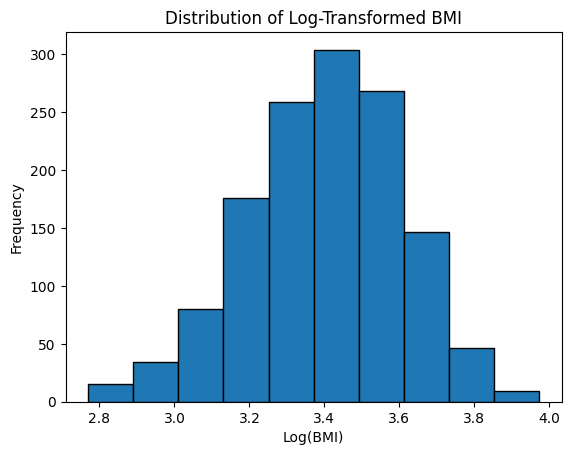

The region with the highest median insurance charge is 'northeast' with a median charge of 10057.65.


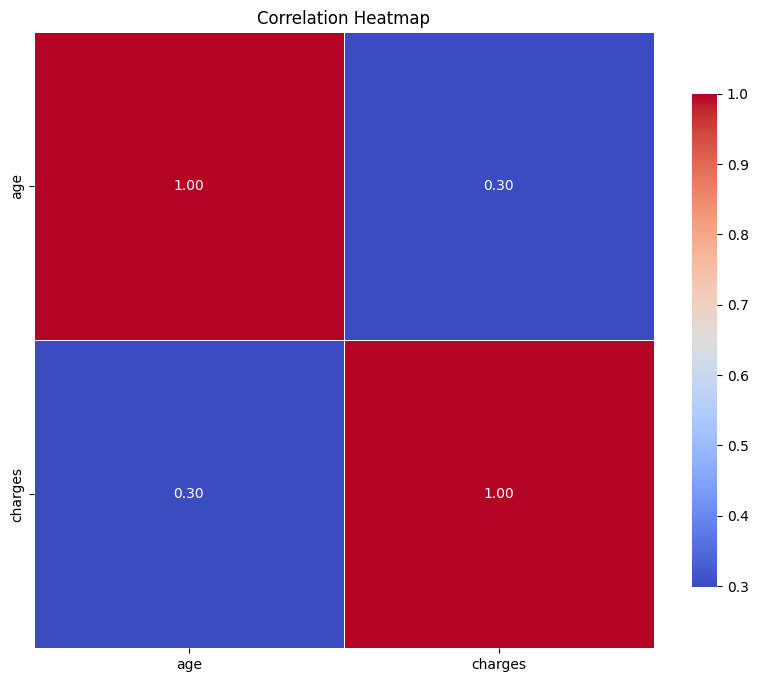

1

In [ ]:
# checking for duplicate values

data['log_bmi'] = np.log(data['bmi'])

# Plot the distribution of the log-transformed bmi
plt.hist(data['log_bmi'], bins=10, edgecolor='black')
plt.title('Distribution of Log-Transformed BMI')
plt.xlabel('Log(BMI)')
plt.ylabel('Frequency')
plt.show()

median_charges = data.groupby('region')['charges'].median()
highest_median_region = median_charges.idxmax()
highest_median_value = median_charges.max()

print(f"The region with the highest median insurance charge is '{highest_median_region}' with a median charge of {highest_median_value:.2f}.")

selected_columns = data[['age', 'charges']]
correlation = selected_columns.corr()
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

data.duplicated().sum()

* There are no duplicate values in the data

# **Exploratory Data Analysis**

## **Univariate Analysis**

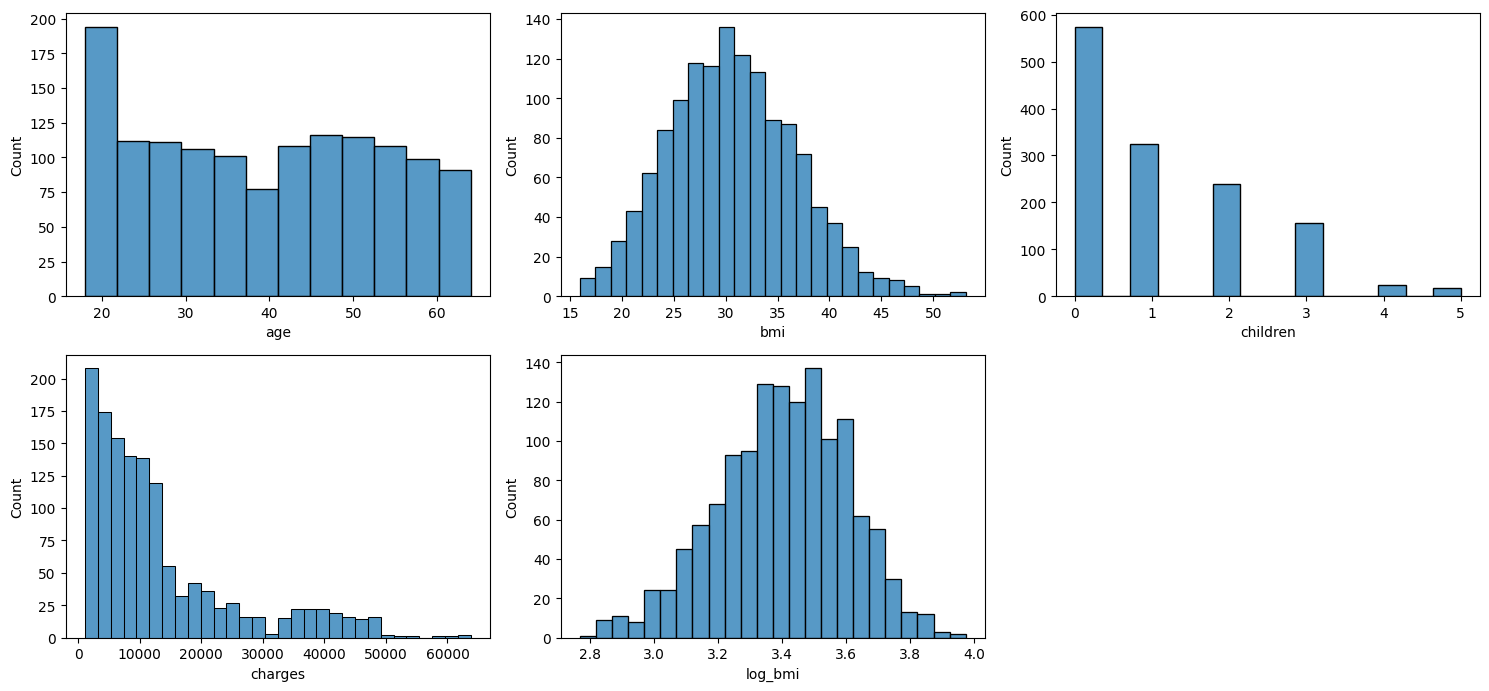

In [ ]:
# defining the figure size
plt.figure(figsize=(15, 10))

# defining the list of numerical features to plot
features = data.select_dtypes(include=['number']).columns.tolist()

# creating the histograms
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)    # assign a subplot in the main plot
    sns.histplot(data=data, x=feature)    # plot the histogram

plt.tight_layout()    # to add spacing between plots
plt.show()

* Sales, Advertising Expenditure, Discount Percentage, and Product Price exhibit left-skewed distributions.
* Return Rate exhibits a right-skewed distribution.
* Campaign Engagement Score and Length of Product Description are approx. normally distributed.

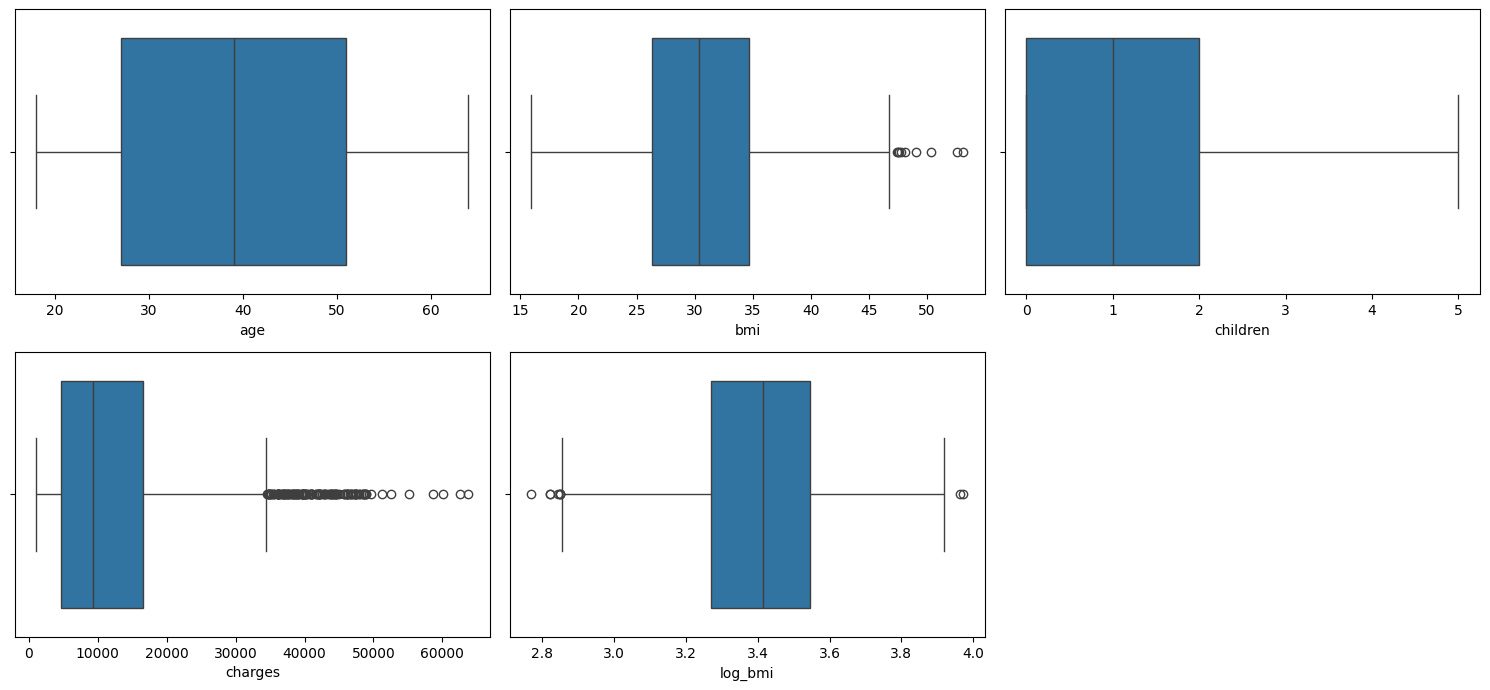

In [ ]:
# defining the figure size
plt.figure(figsize=(15, 10))

# defining the list of numerical features to plot
features = data.select_dtypes(include=['number']).columns.tolist()

# creating the histograms
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)    # assign a subplot in the main plot
    sns.boxplot(data=data, x=feature)    # plot the histogram

plt.tight_layout()    # to add spacing between plots
plt.show()

* There are outliers in all the attributes in the data.

ValueError: num must be an integer with 1 <= num <= 2, not 3

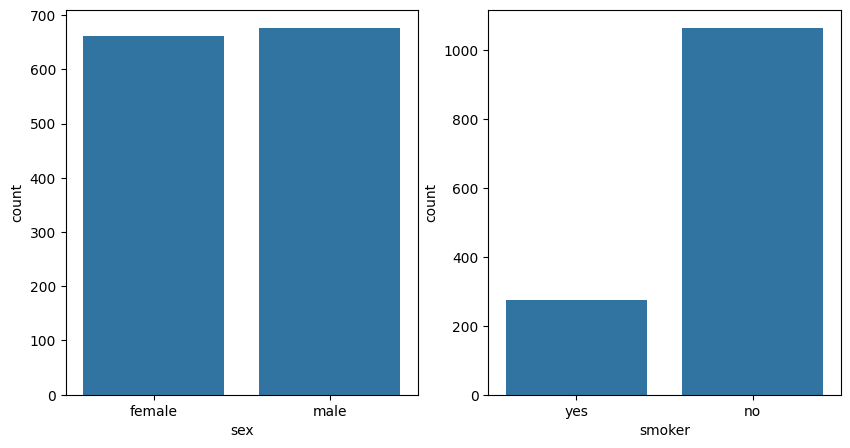

In [ ]:
# defining the figure size
plt.figure(figsize=(10, 5))

# defining the list of categorical features to plot
features = data.select_dtypes(exclude=['number']).columns.tolist()

# creating the histograms
for i, feature in enumerate(features):
    plt.subplot(1, 2, i+1)    # assign a subplot in the main plot
    sns.countplot(data=data, x=feature)    # plot the histogram

plt.tight_layout()    # to add spacing between plots
plt.show()

* The North region has slightly fewer data points than the others.
* Most of the mobiles and tablets sold are very popular, and only a negligible amount of them are very unpopular.

## **Bivariate Analysis**

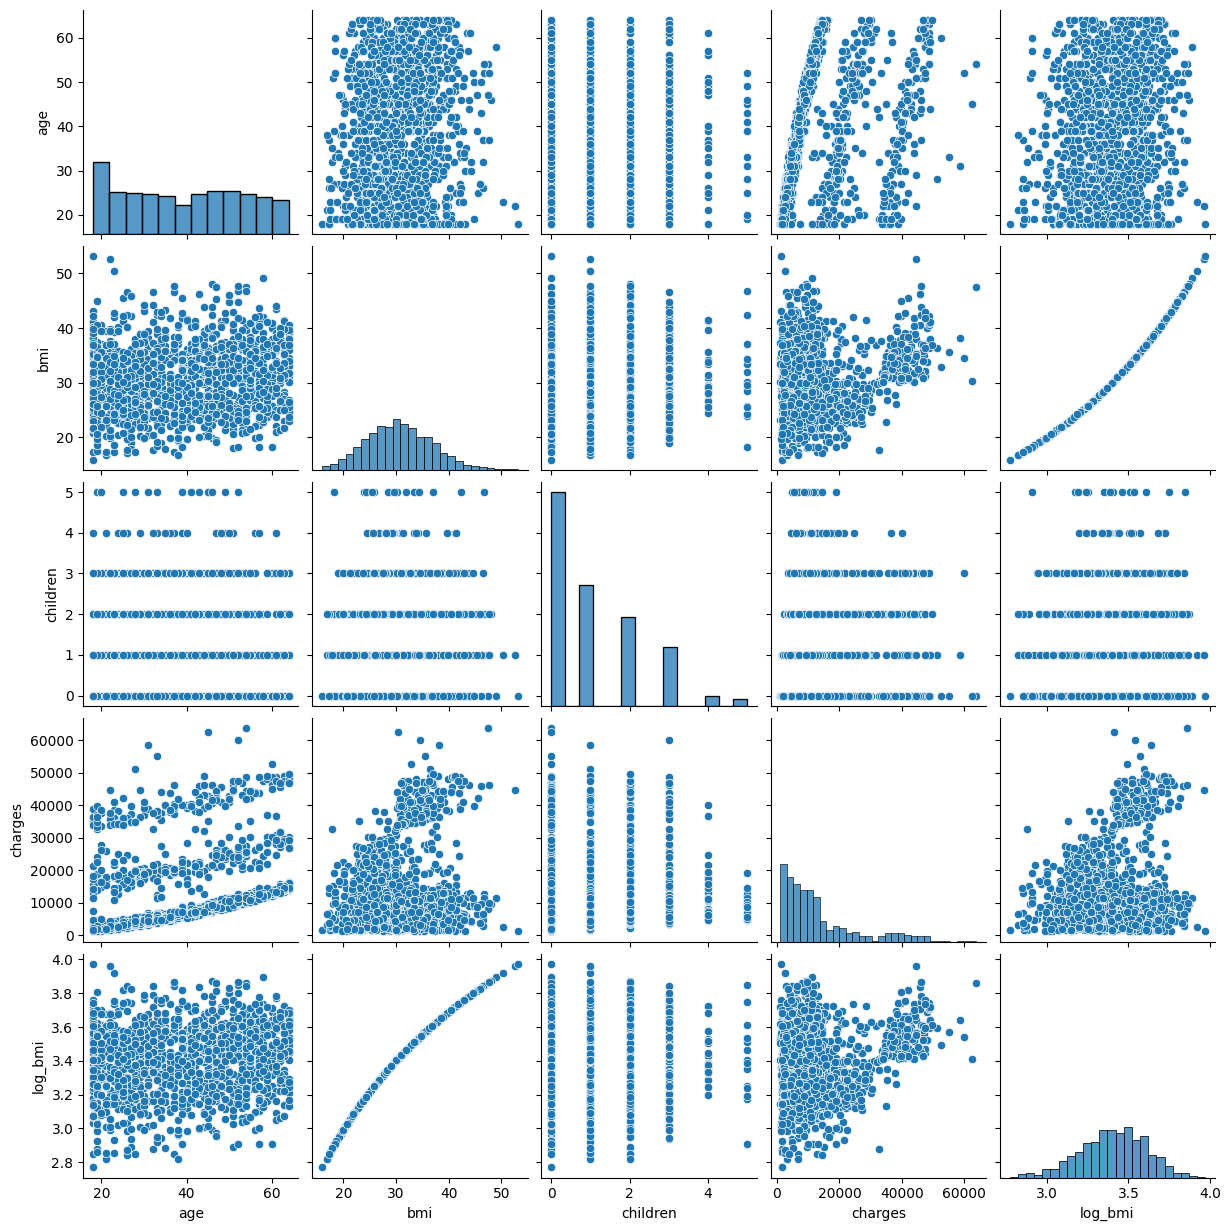

In [ ]:
sns.pairplot(data);

- Sales seem to be positively correlated with Advertising Expenditure, Campaign Engagement Score, and Average Customer Rating.
- Sales seem to be negatively correlated with Product Price and Return Rate.

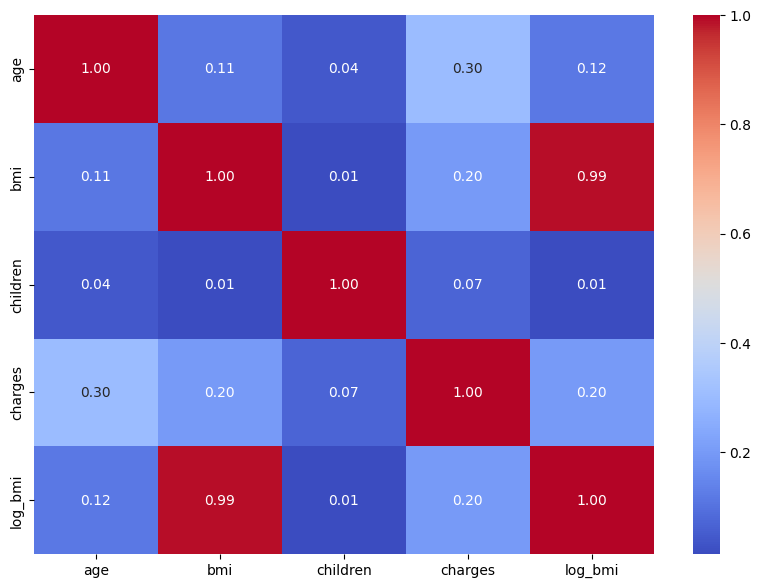

In [ ]:
# defining the figure size
plt.figure(figsize=(10, 7))

# plotting the correlation heatmap
sns.heatmap(data.corr(numeric_only = True), annot=True, fmt='0.2f', cmap='coolwarm');

- Sales is indeed highly positively correlated with Advertising Expenditure.
- Sales are indeed negatively correlated with Product Price and Return Rate, but the strength of the correlation is low.
- Advertising Expenditure and Campaign Engagement Score are positively correlated.
- Return Rate and Average Customer Rating are negatively correlated.

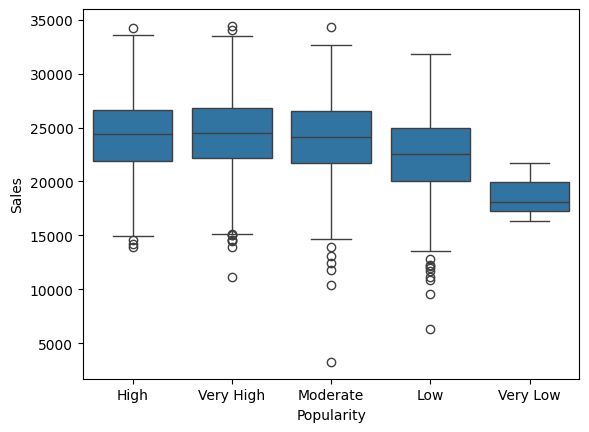

In [ ]:
sns.boxplot(data=data, y='Sales', x='Popularity');

* We observe lower sales for unpopular products.

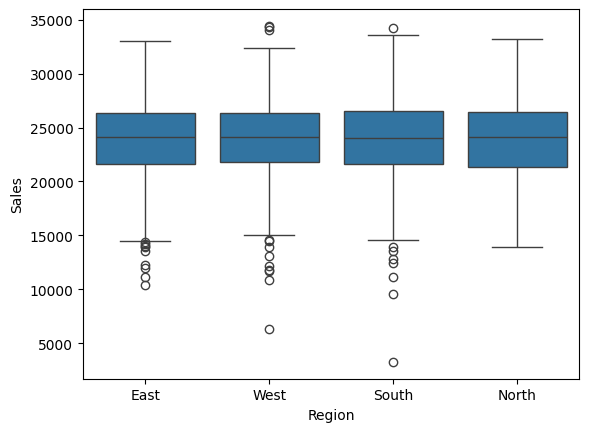

In [ ]:
sns.boxplot(data=data, y='Sales', x='Region');

* Sales seem to be uniform across different regions.

# **Data Preparation for Modeling**

In [ ]:
# defining the explanatory (independent) and response (dependent) variables
#X = data.drop('charges', axis=1)
#y = data['charges']

data.info()

X = data.drop('charges', axis=1)
X = X.drop('log_bmi', axis=1)
X.info()

y = data['charges']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
 7   log_bmi   1338 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
dtypes: float64(1), int

In [ ]:
# splitting the data in 80:20 ratio for train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,    # specifying the independent variables
    y,    # specifying the dependent variable
    test_size=0.30,    # specifying the size of the test set as a fraction of the whole data
    random_state=1    # specifying a seed value to enable reproducible results
)
X_test.shape

(402, 6)

# **Model Building**

## **Simple Linear Regression - `Sales` vs `Advertising Expenditure`**

In [ ]:
# defining the independent variable
ind_vars1 = ['bmi']

In [ ]:
# creating an instance of the linear regression model
lin_reg1 = LinearRegression()

# fitting the model to the training data
lin_reg1.fit(X_train[ind_vars1], y_train)

LinearRegression()

In [ ]:
# printing the linear regression coefficients
print(
    "Slope:", lin_reg1.coef_,
    "Intercept:", lin_reg1.intercept_,
)

Slope: [391.88180398] Intercept: 1252.908613166379


In [ ]:
# printing the linear regression equation
print(
    "Sales =",
     "(", lin_reg1.coef_[0], ")", "*", ind_vars1[0],
    "+", lin_reg1.intercept_,
)

Sales = ( 28.667487552010233 ) * Advertising Expenditure + 6435.891302271037


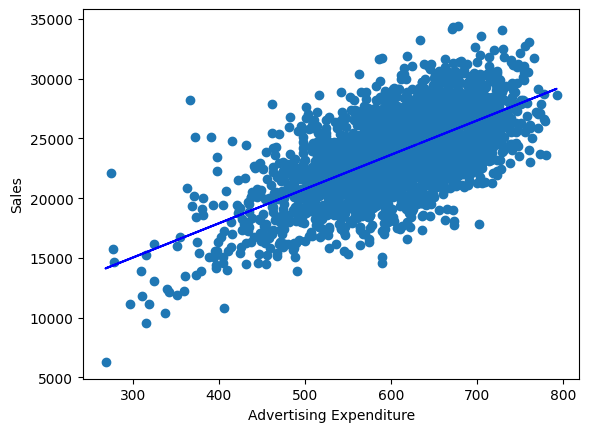

In [ ]:
# plotting the best-fit line
fitted_values1 = lin_reg1.predict(X_train[ind_vars1])

# Plot the scatterplot and regression line
plt.scatter(X_train[ind_vars1], y_train)
plt.plot(X_train[ind_vars1], fitted_values1, color='blue')
plt.xlabel(ind_vars1[0])
plt.ylabel('Sales')
plt.show()

## **Simple Linear Regression - `Sales` vs `Discount Percentage`**

In [ ]:
# defining the independent variable
ind_vars2 = ['Discount Percentage']

In [ ]:
# creating an instance of the linear regression model
lin_reg2 = LinearRegression()

# fitting the model to the training data
lin_reg2.fit(X_train[ind_vars2], y_train)

LinearRegression()

In [ ]:
# printing the linear regression coefficients
print(
    "Slope:", lin_reg2.coef_,
    "Intercept:", lin_reg2.intercept_,
)

Slope: [188.3855554] Intercept: 18411.681879531294


In [ ]:
# printing the linear regression equation
print(
    "Sales =",
    "(", lin_reg2.coef_[0], ")", "*", ind_vars2[0],
    "+", lin_reg2.intercept_,
)

Sales = ( 188.3855554032925 ) * Discount Percentage + 18411.681879531294


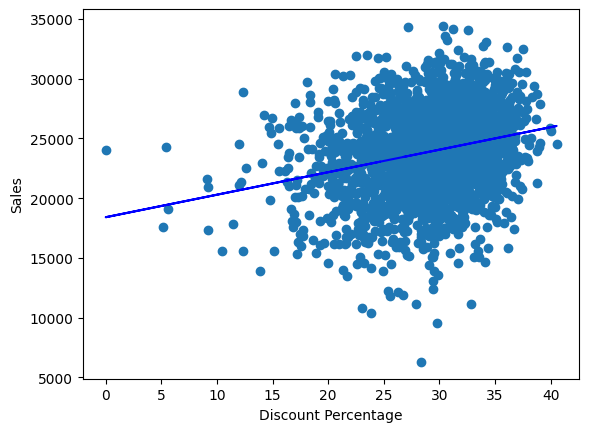

In [ ]:
# plotting the best-fit line
fitted_values2 = lin_reg2.predict(X_train[ind_vars2])

# Plot the scatterplot and regression line
plt.scatter(X_train[ind_vars2], y_train)
plt.plot(X_train[ind_vars2], fitted_values2, color='blue')
plt.xlabel(ind_vars2[0])
plt.ylabel('Sales')
plt.show()

## **Simple Linear Regression - `Sales` vs `Product Price`**

In [ ]:
# defining the independent variable
ind_vars3 = ['Product Price']

In [ ]:
# creating an instance of the linear regression model
lin_reg3 = LinearRegression()

# fitting the model to the training data
lin_reg3.fit(X_train[ind_vars3], y_train)

LinearRegression()

In [ ]:
# printing the linear regression coefficients
print(
    "Slope:", lin_reg3.coef_,
    "Intercept:", lin_reg3.intercept_,
)

Slope: [-2.53923205] Intercept: 27522.91607345547


In [ ]:
# printing the linear regression equation
print(
    "Sales =",
    "(", lin_reg3.coef_[0], ")", "*", ind_vars3[0],
    "+", lin_reg3.intercept_,
)

Sales = ( -2.539232052840615 ) * Product Price + 27522.91607345547


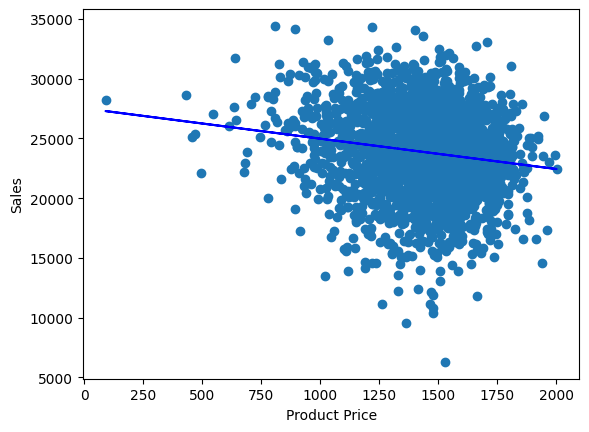

In [ ]:
# plotting the best-fit line
fitted_values3 = lin_reg3.predict(X_train[ind_vars3])

# Plot the scatterplot and regression line
plt.scatter(X_train[ind_vars3], y_train)
plt.plot(X_train[ind_vars3], fitted_values3, color='blue')
plt.xlabel(ind_vars3[0])
plt.ylabel('Sales')
plt.show()

## **Multiple Linear Regression - `Sales` vs `Advertising Expenditure`, `Discount Percentage`**

In [ ]:
# defining the independent variables
ind_vars4 = ['Advertising Expenditure', 'Discount Percentage']

In [ ]:
# creating an instance of the linear regression model
lin_reg4 = LinearRegression()

# fitting the model to the training data
lin_reg4.fit(X_train[ind_vars4], y_train)

LinearRegression()

In [ ]:
# printing the linear regression coefficients
print(
    "Coefficients:", lin_reg4.coef_, lin_reg4.intercept_
)

Coefficients: [28.70843207 -1.80363464] 6463.321146716942


In [ ]:
# printing the linear regression equation
print(
    "Sales =",
    "(", lin_reg4.coef_[0], ")", "*", ind_vars4[0],
    "+ (", lin_reg4.coef_[1], ")", "*", ind_vars4[1],
    "+", lin_reg4.intercept_,
)

Sales = ( 28.708432074450347 ) * Advertising Expenditure + ( -1.8036346364589904 ) * Discount Percentage + 6463.321146716942


## **Multiple Linear Regression - `Sales` vs `Advertising Expenditure`, `Discount Percentage`, `Product Price`**

In [ ]:
# defining the independent variables
ind_vars5 = ['Advertising Expenditure', 'Discount Percentage', 'Product Price']

In [ ]:
# creating an instance of the linear regression model
lin_reg5 = LinearRegression()

# fitting the model to the training data
lin_reg5.fit(X_train[ind_vars5], y_train)

LinearRegression()

In [ ]:
# printing the linear regression coefficients
print(
    "Coefficients:", lin_reg5.coef_, lin_reg5.intercept_
)

Coefficients: [38.43656519 -3.57483935 -8.4559953 ] 12731.131575406755


In [ ]:
# printing the linear regression equation
print(
    "Sales =",
    "(", lin_reg5.coef_[0], ")", "*", ind_vars5[0],
    "+ (", lin_reg5.coef_[1], ")", "*", ind_vars5[1],
    "+ (", lin_reg5.coef_[2], ")", "*", ind_vars5[2],
    "+", lin_reg5.intercept_,
)

Sales = ( 38.43656519116551 ) * Advertising Expenditure + ( -3.5748393468180044 ) * Discount Percentage + ( -8.455995295705076 ) * Product Price + 12731.131575406755


## **Multiple Linear Regression - `Sales` vs `Advertising Expenditure`, `Discount Percentage`, `Product Price`, `Popularity`**

We first need to label encode the `Popularity` column.

In [ ]:
# defining the label encoding
lab_enc = {
    'Very Low': 1,
    'Low': 2,
    'Moderate': 3,
    'High': 4,
    'Very High': 5,
}

In [ ]:
# encoding the Popularity column
X['Popularity'] = X['Popularity'].map(
    lambda x: lab_enc[x]
)

X.head()

,Advertising Expenditure,Campaign Engagement Score,Discount Percentage,Average Customer Rating,Product Price,Return Rate,Length of Product Description,Region,Popularity
0,644.049317,54.565531,25.267151,4.604634,1599.575723,2.133580,231.185389,East,4
1,521.483294,46.875226,35.075859,4.358693,1586.464404,1.553437,262.686931,West,5
2,540.079510,42.287145,12.618381,4.571018,1301.644856,2.274891,324.347319,South,5
3,627.938419,61.825441,31.588445,4.234209,1601.041884,1.035971,447.710984,South,5
4,471.149948,31.061512,9.198991,4.816215,1496.734345,3.276840,310.055333,East,3


In [ ]:
# splitting the data in 80:20 ratio for train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,    # specifying the independent variables
    y,    # specifying the dependent variable
    test_size=0.20,    # specifying the size of the test set as a fraction of the whole data
    random_state=42    # specifying a seed value to enable reproducible results
)

In [ ]:
# defining the independent variables
ind_vars6 = ['Advertising Expenditure', 'Discount Percentage', 'Product Price', 'Popularity']

In [ ]:
# creating an instance of the linear regression model
lin_reg6 = LinearRegression()

# fitting the model to the training data
lin_reg6.fit(X_train[ind_vars6], y_train)

LinearRegression()

In [ ]:
# printing the linear regression coefficients
print(
    "Coefficients:", lin_reg6.coef_, lin_reg6.intercept_
)

Coefficients: [ 38.29568342  -1.58779804  -8.51597761 542.69784813] 10758.596248519574


In [ ]:
# printing the linear regression equation
print(
    "Sales =",
    "(", lin_reg6.coef_[0], ")", "*", ind_vars6[0],
    "+ (", lin_reg6.coef_[1], ")", "*", ind_vars6[1],
    "+ (", lin_reg6.coef_[2], ")", "*", ind_vars6[2],
    "+ (", lin_reg6.coef_[3], ")", "*", ind_vars6[3],
    "+", lin_reg6.intercept_,
)

Sales = ( 38.295683415534135 ) * Advertising Expenditure + ( -1.5877980394796403 ) * Discount Percentage + ( -8.515977612063976 ) * Product Price + ( 542.6978481319416 ) * Popularity + 10758.596248519574


## **Multiple Linear Regression - `Sales` vs All independent variables**

We first need to one-hot encode the `Region` column.

In [ ]:
# creating one-hot encoded (also called dummy) variables
X = pd.get_dummies(
    X,    # defining the dataframe from where to fetch the data
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),    # defining the type of columns for which dummies will be made
    drop_first=True,    # dropping the first dummy column
)

# specifying the datatype of the independent variables dataframe
X = X.astype(float)

X.head()

,age,bmi,children,log_bmi,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19.0,27.900,0.0,3.328627,0.0,1.0,0.0,0.0,1.0
1,18.0,33.770,1.0,3.519573,1.0,0.0,0.0,1.0,0.0
2,28.0,33.000,3.0,3.496508,1.0,0.0,0.0,1.0,0.0
3,33.0,22.705,0.0,3.122585,1.0,0.0,1.0,0.0,0.0
4,32.0,28.880,0.0,3.363149,1.0,0.0,1.0,0.0,0.0


* Note that the dummy variable corresponding to the '*East*' category has been dropped.

In [ ]:
# splitting the data in 80:20 ratio for train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,    # specifying the independent variables
    y,    # specifying the dependent variable
    test_size=0.20,    # specifying the size of the test set as a fraction of the whole data
    random_state=42    # specifying a seed value to enable reproducible results
)

In [ ]:
# creating an instance of the linear regression model
lin_reg7 = LinearRegression()

# fitting the model to the training data
lin_reg7.fit(X_train, y_train)

LinearRegression()

In [ ]:
# printing the linear regression coefficients
print(
    "Coefficients:", lin_reg7.coef_, lin_reg7.intercept_
)

Coefficients: [ 3.68003768e+01  2.07776337e+01 -6.91846629e+00  2.89027810e+03
 -8.67003378e+00 -4.44787734e+02 -5.08833857e-02  1.46842283e+02
 -6.98114448e+00  5.28817618e+01  1.89167361e+02] 469.59902990093906


In [ ]:
# printing the linear regression equation
equation = "Sales = ( " + str(lin_reg7.coef_[0]) + " ) * " + X_train.columns.tolist()[0]

for i in range(1, lin_reg7.coef_.shape[0]):
    equation += " + ( " + str(lin_reg7.coef_[i]) + " ) * " + X_train.columns.tolist()[i]

equation +=  " + " + str(lin_reg7.intercept_)

print(equation)

Sales = ( 36.800376844421486 ) * Advertising Expenditure + ( 20.77763369824956 ) * Campaign Engagement Score + ( -6.91846629129739 ) * Discount Percentage + ( 2890.278101515822 ) * Average Customer Rating + ( -8.670033784471656 ) * Product Price + ( -444.787734180219 ) * Return Rate + ( -0.05088338568116091 ) * Length of Product Description + ( 146.84228310853393 ) * Popularity + ( -6.981144476913013 ) * Region_North + ( 52.88176184795616 ) * Region_South + ( 189.16736137256729 ) * Region_West + 469.59902990093906


# **Model Performance Evaluation**

We first define a set of utility functions to compute MAPE and Adjusted $R^2$, and another one to collate all the metrics into a single dataframe.

In [ ]:
# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regression model
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE
    r2 = r2_score(target, pred)  # to compute R-squared
    adj_r2 = adj_r2_score(predictors, target, pred)  # to compute Adjusted R-squared

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "MAPE": mape,
            "R-squared": r2,
            "Adj R-squared": adj_r2,
        },
        index=[0],
    )

    return df_perf

We'll now check the performance of all the models we've built so far.



## **Simple Linear Regression - `Sales` vs `Advertising Expenditure`**

In [ ]:
lin_reg1_train_perf = model_performance_regression(lin_reg1, X_train[ind_vars1], y_train)
lin_reg1_train_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,2753.419094,2207.551603,9.647262,0.415783,0.415539


In [ ]:
lin_reg1_test_perf = model_performance_regression(lin_reg1, X_test[ind_vars1], y_test)
lin_reg1_test_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,2857.307226,2226.476254,9.96158,0.385518,0.38449


## **Simple Linear Regression - `Sales` vs `Discount Percentage`**

In [ ]:
lin_reg2_train_perf = model_performance_regression(lin_reg2, X_train[ind_vars2], y_train)
lin_reg2_train_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,3489.766337,2761.85512,12.464781,0.061525,0.061134


In [ ]:
lin_reg2_test_perf = model_performance_regression(lin_reg2, X_test[ind_vars2], y_test)
lin_reg2_test_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,3524.541373,2797.50262,13.334384,0.065023,0.06346


## **Simple Linear Regression - `Sales` vs `Product Price`**

In [ ]:
lin_reg3_train_perf = model_performance_regression(lin_reg3, X_train[ind_vars3], y_train)
lin_reg3_train_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,3558.436048,2816.479842,12.759044,0.024228,0.023821


In [ ]:
lin_reg3_test_perf = model_performance_regression(lin_reg3, X_test[ind_vars3], y_test)
lin_reg3_test_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,3601.594159,2843.696093,13.700047,0.023696,0.022063


## **Multiple Linear Regression - `Sales` vs `Advertising Expenditure`, `Discount Percentage`**

In [ ]:
lin_reg4_train_perf = model_performance_regression(lin_reg4, X_train[ind_vars4], y_train)
lin_reg4_train_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,2753.407802,2207.640909,9.64753,0.415787,0.4153


In [ ]:
lin_reg4_test_perf = model_performance_regression(lin_reg4, X_test[ind_vars4], y_test)
lin_reg4_test_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,2857.608291,2226.948004,9.96336,0.385388,0.383329


## **Multiple Linear Regression - `Sales` vs `Advertising Expenditure`, `Discount Percentage`, `Product Price`**

In [ ]:
lin_reg5_train_perf = model_performance_regression(lin_reg5, X_train[ind_vars5], y_train)
lin_reg5_train_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,2170.436447,1757.487072,7.641589,0.636985,0.636531


In [ ]:
lin_reg5_test_perf = model_performance_regression(lin_reg5, X_test[ind_vars5], y_test)
lin_reg5_test_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,2179.437285,1740.589014,7.657319,0.642493,0.640694


## **Multiple Linear Regression - `Sales` vs `Advertising Expenditure`, `Discount Percentage`, `Product Price`, `Popularity`**

In [ ]:
lin_reg6_train_perf = model_performance_regression(lin_reg6, X_train[ind_vars6], y_train)
lin_reg6_train_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,2079.919471,1680.33272,7.286114,0.666633,0.666076


In [ ]:
lin_reg6_test_perf = model_performance_regression(lin_reg6, X_test[ind_vars6], y_test)
lin_reg6_test_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,2047.484172,1639.883732,7.15333,0.684473,0.682352


## **Multiple Linear Regression - `Sales` vs All independent variables**

In [ ]:
lin_reg7_train_perf = model_performance_regression(lin_reg7, X_train, y_train)
lin_reg7_train_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,1940.930335,1564.829605,6.785088,0.709698,0.708361


In [ ]:
lin_reg7_test_perf = model_performance_regression(lin_reg7, X_test, y_test)
lin_reg7_test_perf

,RMSE,MAE,MAPE,R-squared,Adj R-squared
0,1907.839718,1558.392467,6.763019,0.726045,0.72092


# **Model Performance Comparison**

We'll now compare the performances of all the models we built.

In [ ]:
# training performance comparison

# concatenating all the training performance dataframes
models_train_comp_df = pd.concat(
    [
        lin_reg1_train_perf.T,
        lin_reg2_train_perf.T,
        lin_reg3_train_perf.T,
        lin_reg4_train_perf.T,
        lin_reg5_train_perf.T,
        lin_reg6_train_perf.T,
        lin_reg7_train_perf.T,
    ],
    axis=1,
)

# defining the list of models built
models_train_comp_df.columns = [
    "Simple Linear Regression - Sales vs Advertising Expenditure",
    "Simple Linear Regression - Sales vs Discount Percentage",
    "Simple Linear Regression - Sales vs Product Price",
    "Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage",
    "Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage, Product Price",
    "Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage, Product Price, Popularity",
    "Multiple Linear Regression - Sales vs All independent variables",
]

print("Training performance comparison:")
models_train_comp_df.T

Training performance comparison:


,RMSE,MAE,MAPE,R-squared,Adj R-squared
Simple Linear Regression - Sales vs Advertising Expenditure,2753.419094,2207.551603,9.647262,0.415783,0.415539
Simple Linear Regression - Sales vs Discount Percentage,3489.766337,2761.855120,12.464781,0.061525,0.061134
Simple Linear Regression - Sales vs Product Price,3558.436048,2816.479842,12.759044,0.024228,0.023821
"Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage",2753.407802,2207.640909,9.647530,0.415787,0.415300
"Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage, Product Price",2170.436447,1757.487072,7.641589,0.636985,0.636531
"Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage, Product Price, Popularity",2079.919471,1680.332720,7.286114,0.666633,0.666076
Multiple Linear Regression - Sales vs All independent variables,1940.930335,1564.829605,6.785088,0.709698,0.708361


In [ ]:
# test performance comparison

# concatenating all the test performance dataframes
models_test_comp_df = pd.concat(
    [
        lin_reg1_test_perf.T,
        lin_reg2_test_perf.T,
        lin_reg3_test_perf.T,
        lin_reg4_test_perf.T,
        lin_reg5_test_perf.T,
        lin_reg6_test_perf.T,
        lin_reg7_test_perf.T,
    ],
    axis=1,
)

# defining the list of models built
models_test_comp_df.columns = [
    "Simple Linear Regression - Sales vs Advertising Expenditure",
    "Simple Linear Regression - Sales vs Discount Percentage",
    "Simple Linear Regression - Sales vs Product Price",
    "Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage",
    "Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage, Product Price",
    "Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage, Product Price, Popularity",
    "Multiple Linear Regression - Sales vs All independent variables",
]

print("Test performance comparison:")
models_test_comp_df.T

Test performance comparison:


,RMSE,MAE,MAPE,R-squared,Adj R-squared
Simple Linear Regression - Sales vs Advertising Expenditure,2857.307226,2226.476254,9.961580,0.385518,0.384490
Simple Linear Regression - Sales vs Discount Percentage,3524.541373,2797.502620,13.334384,0.065023,0.063460
Simple Linear Regression - Sales vs Product Price,3601.594159,2843.696093,13.700047,0.023696,0.022063
"Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage",2857.608291,2226.948004,9.963360,0.385388,0.383329
"Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage, Product Price",2179.437285,1740.589014,7.657319,0.642493,0.640694
"Multiple Linear Regression - Sales vs Advertising Expenditure, Discount Percentage, Product Price, Popularity",2047.484172,1639.883732,7.153330,0.684473,0.682352
Multiple Linear Regression - Sales vs All independent variables,1907.839718,1558.392467,6.763019,0.726045,0.720920


* Advertising Expenditure seems to be a good predictor of Sales.
* Discount Percentage and Product Price are individually poor predictors of Sales. But when combined with Advertising Expenditure, they together provide good predictive power.
* The final model with all independent variables exhibits the best performance.

<font size=6 color='blue'>Power Ahead</font>
___